In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential # is used to build a sequential NN
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, BatchNormalization, ConvLSTM2D
from tensorflow.keras.layers import Conv1D, TimeDistributed
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam

In [4]:
from sklearn.model_selection import train_test_split # to automatically split the dataset into trining and testing sets
from tensorflow.keras.utils import to_categorical # to convert data to one hot encoded data

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt 
from keras_tuner.tuners import BayesianOptimization
from keras_tuner.engine.hyperparameters import HyperParameters

#Data for Signer Dependent mode 

In [6]:
#path for exported data, numpy arrays
DATA_PATH = os.path.join('EthSL_Dataset')
actions = np.array(['ሀዘን','ህመም','ለምን', 'ልምምድ', 'መራራ', 'መናደድ', 'መጀመር', 'መገረም', 
                    'መጥፎ', 'መጨረስ', 'መጨነቅ', 'ማሸነፍ', 'ምስጋና', 'ቀላል', 'ተነስ', 'አስቸጋሪ', 
                    'እህት', 'ወንድም', 'ይቅርታ', 'ጎበዝ'])

no_sequences = 40 #number of videos to be captured is set to 280
sequence_length = 30 #number of frames in each video is set to 30

In [7]:
label_map = {label:num for num, label in enumerate(actions)}

In [8]:
# build big array which contains all data
sequences, labels = [], [] # feature and label data respectively
for action in actions:
    for sequence in range(no_sequences):
        window = [] # represents all frames in a specific video
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window) # all data for each word is appended and a single numpy array is created
        labels.append(label_map[action])

In [9]:
x = np.array(sequences)

In [10]:
y = to_categorical(labels).astype(int)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5040, 30, 1662), (560, 30, 1662), (5040, 20), (560, 20))

#Data for Signer Independent mode

#Load training data

In [10]:
#path for exported data, numpy arrays to load training data
DATA_PATH_train = os.path.join('EthSL_Train')
actions_train = np.array(['ሀዘን','ህመም','ለምን', 'ልምምድ', 'መራራ', 'መናደድ', 'መጀመር', 'መገረም', 
                    'መጥፎ', 'መጨረስ', 'መጨነቅ', 'ማሸነፍ', 'ምስጋና', 'ቀላል', 'ተነስ', 'አስቸጋሪ', 
                    'እህት', 'ወንድም', 'ይቅርታ', 'ጎበዝ'])

no_sequences_train = 240 #number of videos to be captured is set to 240
sequence_length_train = 30 #number of frames in each video is set to 30

In [11]:
label_map_train = {label:num for num, label in enumerate(actions_train)}

In [12]:
# build big array which contains all training data
sequences_train, labels_train = [], [] # feature and label data respectively
for action_train in actions_train:
    for sequence_train in range(no_sequences_train):
        window_train = [] # represents all frames in a specific video
        for frame_num_train in range(sequence_length_train):
            res_train = np.load(os.path.join(DATA_PATH_train, action_train, str(sequence_train), "{}.npy".format(frame_num_train)))
            window_train.append(res_train)
        sequences_train.append(window_train) # all data for each word is appended and a single numpy array is created
        labels_train.append(label_map_train[action_train])

In [13]:
x_training = np.array(sequences_train)

In [15]:
y_training = to_categorical(labels_train).astype(int)

In [84]:
x_train, x_val, y_train, y_val = train_test_split(x_training, y_training, test_size=0.12)

In [85]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((4224, 30, 1662), (576, 30, 1662), (4224, 20), (576, 20))

#Load test data

In [18]:
#path for exported data, numpy arrays to load test data
DATA_PATH_test = os.path.join('EthSL_Test')
actions_test = np.array(['ሀዘን','ህመም','ለምን', 'ልምምድ', 'መራራ', 'መናደድ', 'መጀመር', 'መገረም', 
                    'መጥፎ', 'መጨረስ', 'መጨነቅ', 'ማሸነፍ', 'ምስጋና', 'ቀላል', 'ተነስ', 'አስቸጋሪ', 
                    'እህት', 'ወንድም', 'ይቅርታ', 'ጎበዝ'])

no_sequences_test = 40 #number of videos to be captured is set to 40
sequence_length_test = 30 #number of frames in each video is set to 30

In [19]:
label_map_test = {label:num for num, label in enumerate(actions_test)}

In [20]:
# build big array which contains all testing data
sequences_test, labels_test = [], [] # feature and label data respectively
for action_test in actions_test:
    for sequence_test in range(no_sequences_test):
        window_test = [] # represents all frames in a specific video
        for frame_num_test in range(sequence_length_test):
            res_test = np.load(os.path.join(DATA_PATH_test, action_test, str(sequence_test), "{}.npy".format(frame_num_test)))
            window_test.append(res_test)
        sequences_test.append(window_test) # all data for each word is appended and a single numpy array is created
        labels_test.append(label_map_test[action_test])

In [21]:
x_testing = np.array(sequences_test)

In [22]:
y_testing = to_categorical(labels_test).astype(int)

In [61]:
#To split some of the data and take the larger portion for testing
x_trainT, x_test, y_trainT, y_test = train_test_split(x_testing, y_testing, test_size= 0.95)

#Reshape the train and test data to fit for CNN model

In [14]:
# it is necessary to change the shape of the input_shape so that it can fit to CNNLSTM model
n_timesteps, n_features, n_outputs = x_train.shape[1], x_train.shape[2], y_train.shape[1]
n_steps, n_length = 2, 15
x_train = x_train.reshape((x_train.shape[0], n_steps, n_length, n_features))

In [87]:
x_val = x_val.reshape((x_val.shape[0], n_steps, n_length, n_features))

In [14]:
x_test = x_test.reshape((x_test.shape[0], n_steps, n_length, n_features))

In [16]:
x_train.shape, x_test.shape

((5040, 2, 15, 1662), (560, 2, 15, 1662))

In [15]:
def build_model(hp):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation = 'relu',
        padding = 'same',
        input_shape=(None, n_length, n_features))))
    model.add(TimeDistributed(BatchNormalization()))
    
    for i in range(hp.Int('middle_n_layers', 1, 7)):
        model.add(TimeDistributed(Conv1D(
        filters=hp.Int('middle_filters_' + str(i), min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('middle_conv_kernel_' + str(i), values = [3,5]),
        activation = 'relu',
        padding = 'same')))
        model.add(TimeDistributed(BatchNormalization()))
        #model.add(TimeDistributed(Dropout(hp.Float('Dropout_rate1', min_value = 0, max_value = 0.5,step = 0.1))))
        
    #model.add(TimeDistributed(Dropout(hp.Float('Dropout_rate', min_value = 0, max_value = 0.5,step = 0.1))))   
    model.add(TimeDistributed(Flatten()))
    
    for i in range(hp.Int('lstm_layers', 1, 10)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32), recurrent_activation='hard_sigmoid', return_sequences=True))
        #model.add(Dropout(hp.Float('Dropout_rate2',min_value=0,max_value=0.5,step=0.1)))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=32), recurrent_activation='hard_sigmoid'))
    #model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    
    model.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
                    activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))  
    #model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(20, activation='softmax'))
    
    #compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
    return model

In [18]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor= 'val_categorical_accuracy', patience = 5)

In [19]:
#A tuner for CNNLSTM
tunerCNNLSTM = BayesianOptimization(
        build_model,
        objective = 'val_categorical_accuracy',
        #overwrite = True,
        max_trials = 10,
        alpha = 0.0001,
        beta = 2.6,
        max_retries_per_trial = 1,
        max_consecutive_failed_trials = 3,
        directory = 'tuneCNNLSTM_Round2',
        project_name="CNNLSTMTunerReshaped"
        )

INFO:tensorflow:Reloading Tuner from tuneCNNLSTM_Round2\CNNLSTMTunerReshaped\tuner0.json


In [22]:
tunerCNNLSTM.search(
        x_train,
        y_train,
        epochs = 70,
        batch_size = 16,
        validation_split = 0.2,
        callbacks = [stop_early]
        )

Trial 10 Complete [00h 14m 12s]
val_categorical_accuracy: 0.0446428582072258

Best val_categorical_accuracy So Far: 0.8680555820465088
Total elapsed time: 05h 59m 22s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [20]:
tunerCNNLSTM.reload()

In [21]:
best_hps = tunerCNNLSTM.get_best_hyperparameters(num_trials = 1)[0]

In [16]:
tunerCNNLSTM.results_summary()

Results summary
Results in tuneCNNLSTM_Round2\CNNLSTMTunerReshaped
Showing 10 best trials
Trial summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 3
middle_n_layers: 1
middle_filters_0: 80
middle_conv_kernel_0: 3
lstm_layers: 2
lstm_0_units: 288
layer_2_neurons: 224
dense_1_units: 96
dense_activation: sigmoid
learning_rate: 0.0001
middle_filters_1: 32
middle_conv_kernel_1: 5
lstm_1_units: 512
Score: 0.8680555820465088
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 5
middle_n_layers: 2
middle_filters_0: 112
middle_conv_kernel_0: 5
lstm_layers: 2
lstm_0_units: 64
layer_2_neurons: 512
dense_1_units: 96
dense_activation: relu
learning_rate: 0.001
middle_filters_1: 32
middle_conv_kernel_1: 3
lstm_1_units: 32
Score: 0.6051587462425232
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 3
middle_n_layers: 7
middle_filters_0: 112
middle_conv_kernel_0: 3
lstm_layers: 6
lstm_0_units: 128
layer_2_neurons: 192
dense_1_units: 48
dense_activation: sigmoid
learning

In [22]:
#tunerCNNLSTM should be changed while doing for ConvLSTM
model = tunerCNNLSTM.hypermodel.build(best_hps)

#The name of the model should be changed to CLSTMEthSLR
CNNLSTMEthSLR = model.fit(x_train, y_train, epochs = 5, batch_size = 16, validation_data = (x_test,  y_test)) 

Epoch 1/5
45/45 [==============================] - ETA: 0s - loss: 3.0745 - categorical_accuracy: 0.0500WARNING:tensorflow:Model was constructed with shape (16, 2, 15, 1662) for input KerasTensor(type_spec=TensorSpec(shape=(16, 2, 15, 1662), dtype=tf.float32, name='time_distributed_10_input'), name='time_distributed_10_input', description="created by layer 'time_distributed_10_input'"), but it was called on an input with incompatible shape (16, 30, 1662).


ValueError: in user code:

    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1756, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "time_distributed_10" is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: (16, 30, 1662)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(16, 30, 1662), dtype=float32)
      • training=False
      • mask=None


In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_10 (TimeDi  (16, 2, 15, 48)          239376    
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (16, 2, 15, 48)          192       
 stributed)                                                      
                                                                 
 time_distributed_12 (TimeDi  (16, 2, 15, 80)          11600     
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (16, 2, 15, 80)          320       
 stributed)                                                      
                                                                 
 time_distributed_14 (TimeDi  (16, 2, 1200)           

In [ ]:
import pandas as pd 
pd.DataFrame(CNNLSTMEthSLR.history)

<function matplotlib.pyplot.show(close=None, block=None)>

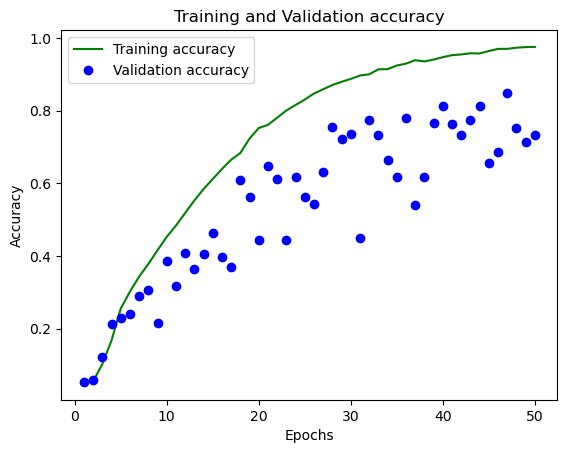

In [25]:
acc = CNNLSTMEthSLR.history['categorical_accuracy']
acc_val = CNNLSTMEthSLR.history['val_categorical_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'bo', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

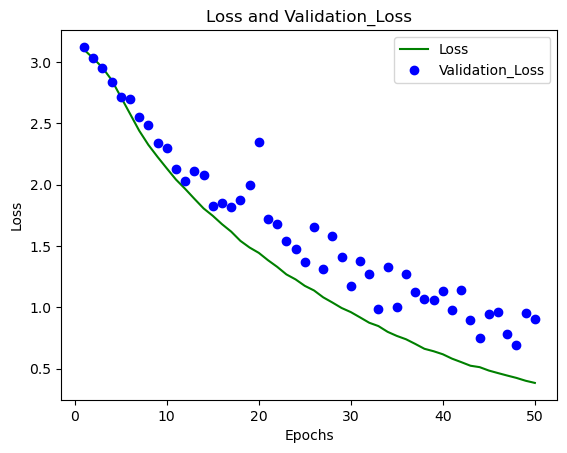

In [19]:
loss1 = CNNLSTMEthSLR.history['loss']
val_loss1 = CNNLSTMEthSLR.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss1, 'g', label='Loss')
plt.plot(epochs, val_loss1, 'bo', label='Validation_Loss')
plt.title('Loss and Validation_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [88]:
from sklearn import metrics
yhat = model.predict(x_val)

18/18 [==============================] - 21s 260ms/step


In [89]:
ytrue = np.argmax(y_val, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [42]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [43]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[523,   5],
        [ 27,   5]],

       [[502,  27],
        [ 31,   0]],

       [[486,  45],
        [  3,  26]],

       [[518,  12],
        [ 28,   2]],

       [[397, 141],
        [  1,  21]],

       [[530,   1],
        [ 29,   0]],

       [[529,   0],
        [ 31,   0]],

       [[528,   7],
        [ 25,   0]],

       [[504,  32],
        [ 22,   2]],

       [[534,   2],
        [ 16,   8]],

       [[530,   1],
        [ 26,   3]],

       [[529,   1],
        [ 30,   0]],

       [[534,   0],
        [ 26,   0]],

       [[467,  67],
        [ 14,  12]],

       [[525,   7],
        [ 25,   3]],

       [[523,   6],
        [ 20,  11]],

       [[480,  52],
        [ 15,  13]],

       [[519,  15],
        [ 25,   1]],

       [[533,   1],
        [ 12,  14]],

       [[510,  17],
        [ 33,   0]]], dtype=int64)

In [90]:
from sklearn.metrics import classification_report

label_names = ['ሀዘን','ህመም','ለምን', 'ልምምድ', 'መራራ', 'መናደድ', 'መጀመር', 'መገረም', 
                    'መጥፎ', 'መጨረስ', 'መጨነቅ', 'ማሸነፍ', 'ምስጋና', 'ቀላል', 'ተነስ', 'አስቸጋሪ', 
                    'እህት', 'ወንድም', 'ይቅርታ', 'ጎበዝ']

#print(classification_report(ytrue, yhat,target_names=label_names))
print(classification_report(ytrue, yhat, target_names=label_names, zero_division=0))

              precision    recall  f1-score   support

         ሀዘን       1.00      0.59      0.74        29
         ህመም       1.00      0.91      0.95        22
         ለምን       0.74      0.88      0.81        26
        ልምምድ       1.00      0.18      0.31        38
         መራራ       0.71      0.74      0.72        23
        መናደድ       0.88      0.70      0.78        30
        መጀመር       0.71      0.43      0.53        28
        መገረም       1.00      0.57      0.72        37
         መጥፎ       0.47      0.90      0.61        30
        መጨረስ       0.75      0.75      0.75        32
        መጨነቅ       0.32      1.00      0.48        29
        ማሸነፍ       1.00      0.79      0.89        34
        ምስጋና       0.63      0.68      0.66        28
         ቀላል       0.45      0.92      0.60        24
         ተነስ       0.75      0.78      0.76        27
       አስቸጋሪ       1.00      0.47      0.64        32
         እህት       0.78      0.27      0.40        26
        ወንድም       1.00    

In [1]:
from tensorflow.keras.models import save_model
from pickle import dump,load

In [44]:
#save the model with different names
save_model(model,'CNNvLSTM2nd_Round.h5')

In [45]:
sequence = [] # capture frames
sentence = [] # to concatenate inputs
prediction = []
threshold = 0.5

cap = cv2.VideoCapture(1)

#set mediapipe model detection and tracking confidence
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: 
    
    # Create loop to collect the words
    for action in actions:
        
        # Create loop to collect videos for each word
        for sequence in range(no_sequences):
            
            # Collect specified number of frames for each video
            for frame_num in range(sequence_length):
                
        
                # read inputs from signers
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)
                #print(results)

                #Draw landmarks
                draw_styled_landmarks(image, results)
                
                # start collecting input videos until specified number is reached
                # 2 second is given a break to prepare for the next signing
                if frame_num == 0:
                    cv2.putText(image, 'Starting Collection ...', (120, 200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'. format(action, sequence), (15, 12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'. format(action, sequence), (15, 12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                
                # Extracting and saving keypoints to their respective folders as numpy arrays
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Prediction logic
                keypoints = extract_keypoints(results)
                sequence.append(keypoints)
                sequence = sequence[-30:]
                
                if len(sequence) == 30:
                    res = model.predict(np.expand_dims(sequence, axis=0))[0]
                    print(actions[np.argmax(res)])
                    predictions.append(np.argmax(res))
                
                # show real time prediction
                if np.unique(predictions[-10:])[0] == np.argmax(res):
                    if res[np.argmax(res)] > threshold: 

                        if len(sentence) > 0:
                            
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])
                
                if len(sentence) > 5:
                    sentence = sentence[-5:]
                    
                cv2.rectange(image, (0, 0), (640, 40), (245, 117, 16), -1)
                cv2.putText(image, ' '.join(sentence), (3, 30),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                        
                
                
                cv2.imshow('Interface', image)
                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'mp_holistic' is not defined